# Sanity Check:
## AV Behavior in same scenario without modifying friction before/after friction implementation

## Testing Parameters for clear-sunset
- cloudiness = 100
- precipitation = 0
- **precipitation_deposits = 0**    
- sun_altitude_angle = 5
- sun_azimuth_angle = 0
- **wetness = 0**
- fog_density = 0
- wind_intensity = 10
- ice_thickness = 0

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats
from scipy.stats import norm, binom, poisson
from dtaidistance import dtw
import json

### After Reducing Friction Setup

In [7]:
rel_path = "./Data/Ghost Cutin/Rain Reduced Friction Exponential/route_highway_epoch24_clear-sunset_fi_ghost_cutin"
os.path.isdir(rel_path)

True

In [8]:
txt_lists_fric = []
for root, dirs, files in os.walk(rel_path):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists_fric.append(json_object)

In [9]:
count = 0
for txt in txt_lists_fric:
    if txt['_checkpoint']['records'][0]['status'] == 'Completed':
        count += 1

print("Average complete ratio:", count/100)

Average complete ratio: 1.0


In [10]:
count = 0
for txt in txt_lists_fric:
    count += txt['_checkpoint']['records'][0]['scores']['score_route']   
print("Average score route:", count/100)

Average score route: 100.0


#### Setting up into list of DataFrames

In [11]:
os.chdir("C:\\Senior Research & Thesis\\Simulations")

In [12]:
os.path.isdir("./Data/Ghost Cutin/Rain Original/Simulations Rain PC/route_highway_epoch24_clear-sunset_fi_ghost_cutin\\route_highway_epoch24_clear-sunset_fi_ghost_cutin_0\\")

True

In [13]:
df_array_orig = np.empty(100, dtype=object)

for i in range(len(df_array_orig)):
    df_array_orig[i] = pd.DataFrame()

In [14]:
dir_path = rel_path

# list to store files
res = []

# Iterate directory
run_index = 0
for path in os.listdir(dir_path):
    # check if current path is a file
    if not os.path.isfile(os.path.join(dir_path, path)):
        df = pd.DataFrame()
        for file in os.listdir(os.path.join(dir_path, path)):
            file_path = os.path.join(dir_path, os.path.join(path, file))
#             print("file_path", file_path)
            if "_ctl.csv" in file_path:
                df = pd.read_csv(file_path)
            elif "_cvip.csv" in file_path:
                temp = pd.read_csv(file_path)
                df = pd.concat([df, temp], axis=1)
            elif "_traj.csv" in file_path:
                temp = pd.read_csv(file_path)
                df = pd.concat([df, temp], axis=1)

        df_array_orig[run_index] = df
        run_index += 1

In [15]:
df_array_orig[0]

,ts,agent_id,throttle,steer,brake,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z,ts,agent_id,x,y,z,v
0,1439477,0,0.900000,-0.013041,0.0,1439477,0,500.491189,198.767441,-95.832657,-499.819366,1439477,0,192.362411,-86.262680,0.539326,0.000000
1,1439478,0,0.900000,-0.000515,0.0,1439478,0,5.595580,195.567444,-90.832657,0.100000,1439478,0,192.362411,-86.262680,0.491906,0.000000
2,1439479,0,0.900000,-0.011084,0.0,1439479,0,5.592365,195.567444,-90.832657,0.095407,1439479,0,192.362411,-86.262680,0.438374,0.000000
3,1439480,0,0.900000,-0.004769,0.0,1439480,0,5.589578,195.567444,-90.832657,0.084691,1439480,0,192.362411,-86.262680,0.378732,0.000000
4,1439481,0,0.900000,0.000125,0.0,1439481,0,5.587154,195.567444,-90.832657,0.069311,1439481,0,192.362411,-86.262680,0.312981,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1440229,0,0.486201,-0.001529,0.0,1440229,0,54.770809,192.563019,97.781723,0.001830,1440229,0,193.186905,43.014477,0.033863,9.351099
753,1440230,0,0.497011,-0.001434,0.0,1440230,0,54.870044,192.558350,98.114845,0.001836,1440230,0,193.184387,43.248383,0.033858,9.358448
754,1440231,0,0.476958,-0.001659,0.0,1440231,0,54.968588,192.553375,98.447456,0.001843,1440231,0,193.181885,43.482471,0.033854,9.365554
755,1440232,0,0.471986,-0.002172,0.0,1440232,0,55.066513,192.548126,98.779610,0.001849,1440232,0,193.179367,43.716724,0.033851,9.372461


### Original Friction Setup

In [16]:
txt_lists_orig = []
for root, dirs, files in os.walk("./Data/Ghost Cutin/Rain Original/Simulations Rain PC/route_highway_epoch24_clear-sunset_fi_ghost_cutin"):
    for file in files:
        if file.endswith(".txt"):
             with open(os.path.join(root, file), encoding = 'utf-8') as f:
                read_string = f.read()
                json_object = json.loads(read_string)
                txt_lists_orig.append(json_object)

In [17]:
count = 0
for txt in txt_lists_orig:
    if txt['_checkpoint']['records'][0]['status'] == 'Completed':
        count += 1
print("Average complete ratio:", count/100)

Average complete ratio: 1.0


In [18]:
count = 0
for txt in txt_lists_orig:
    count += txt['_checkpoint']['records'][0]['scores']['score_route']   
print("Average score route:", count/100)

Average score route: 100.0


#### Setting up into list of DataFrames

In [19]:
df_array_fric = np.empty(100, dtype=object)

for i in range(len(df_array_orig)):
    df_array_fric[i] = pd.DataFrame()

In [21]:
os.path.isdir("./Data/Ghost Cutin/Rain Original/Simulations Rain PC/route_highway_epoch24_clear-sunset_fi_ghost_cutin")

True

In [22]:
dir_path = './Data/Ghost Cutin/Rain Original/Simulations Rain PC/route_highway_epoch24_clear-sunset_fi_ghost_cutin'

# list to store files
res = []

# Iterate directory
run_index = 0
for path in os.listdir(dir_path):
    # check if current path is a file
    if not os.path.isfile(os.path.join(dir_path, path)):
        df = pd.DataFrame()
        for file in os.listdir(os.path.join(dir_path, path)):
            file_path = os.path.join(dir_path, os.path.join(path, file))
            
#             print(file_path)
            
            if "_ctl.csv" in file_path:
                df = pd.read_csv(file_path)
            elif "_cvip.csv" in file_path:
                temp = pd.read_csv(file_path)
                df = pd.concat([df, temp], axis=1)
            elif "_traj.csv" in file_path:
                temp = pd.read_csv(file_path)
                df = pd.concat([df, temp], axis=1)

        df_array_fric[run_index] = df
        run_index += 1

In [23]:
df_array_fric[0]

,ts,agent_id,throttle,steer,brake,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z,ts,agent_id,x,y,z,v
0,1111515,0,0.900000,-0.010707,0.0,1111515,0,500.491189,198.767441,-95.832657,-499.819366,1111515,0,192.362411,-86.262680,0.539326,0.000000
1,1111516,0,0.900000,-0.000900,0.0,1111516,0,5.595580,195.567444,-90.832657,0.100000,1111516,0,192.362411,-86.262680,0.491906,0.000000
2,1111517,0,0.900000,-0.011500,0.0,1111517,0,5.592365,195.567444,-90.832657,0.095407,1111517,0,192.362411,-86.262680,0.438374,0.000000
3,1111518,0,0.900000,-0.004868,0.0,1111518,0,5.589578,195.567444,-90.832657,0.084691,1111518,0,192.362411,-86.262680,0.378732,0.000000
4,1111519,0,0.900000,0.000147,0.0,1111519,0,5.587154,195.567444,-90.832657,0.069311,1111519,0,192.362411,-86.262680,0.312981,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,1112267,0,0.477660,-0.001647,0.0,1112267,0,54.731224,192.563019,97.781723,0.001830,1112267,0,193.187317,43.054070,0.033861,9.350500
753,1112268,0,0.478471,-0.000942,0.0,1112268,0,54.830479,192.558350,98.114845,0.001836,1112268,0,193.184921,43.287956,0.033857,9.357665
754,1112269,0,0.467884,-0.001690,0.0,1112269,0,54.929054,192.553375,98.447456,0.001843,1112269,0,193.182495,43.522015,0.033853,9.364561
755,1112270,0,0.465332,-0.002328,0.0,1112270,0,55.027003,192.548126,98.779610,0.001849,1112270,0,193.180099,43.756245,0.033850,9.371095


In [33]:
df_array_orig[0]['x']

0      192.362411
1      192.362411
2      192.362411
3      192.362411
4      192.362411
          ...    
752    193.186905
753    193.184387
754    193.181885
755    193.179367
756    193.176895
Name: x, Length: 757, dtype: float64

## Comparison

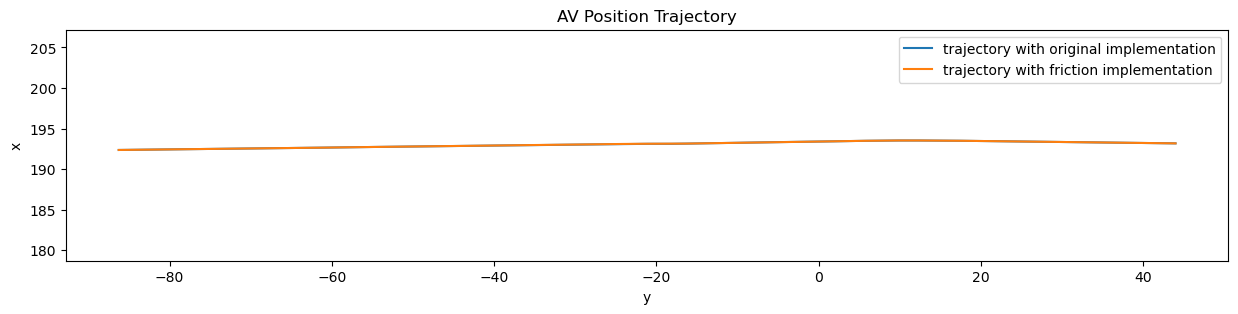

In [55]:
plt.figure(figsize=(15,3))

df_orig_x = pd.DataFrame()
df_orig_y = pd.DataFrame()

for i in range(0, len(df_array_orig)):
    if(df_array_orig[i]['x'].dtypes == 'object' or df_array_orig[i]['y'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_orig[i]['x'].isnull().values.any() and not df_array_orig[i]['y'].isnull().values.any():
            df_orig_x["Run"+str(i)] = df_array_orig[i]['x']
            df_orig_y["Run"+str(i)] = df_array_orig[i]['y']

median_orig_x = df_orig_x.median(axis=1)
median_orig_y = df_orig_y.median(axis=1)

plt.plot(median_orig_y, median_orig_x)


df_fric_x = pd.DataFrame()
df_fric_y = pd.DataFrame()

for i in range(0, len(df_array_fric)):
    if(df_array_fric[i]['x'].dtypes == 'object' or df_array_fric[i]['y'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[i]['x'].isnull().values.any() and not df_array_fric[i]['y'].isnull().values.any():
            df_fric_x["Run"+str(i)] = df_array_fric[i]['x']
            df_fric_y["Run"+str(i)] = df_array_fric[i]['y']

median_fric_x = df_fric_x.median(axis=1)
median_fric_y = df_fric_y.median(axis=1)

plt.plot(median_fric_y, median_fric_x)

plt.axis('equal')
plt.xlabel("y")
plt.ylabel("x")
plt.title("AV Position Trajectory")
plt.legend(["trajectory with original implementation", "trajectory with friction implementation"])
plt.show()

### Since no accident, check cvip

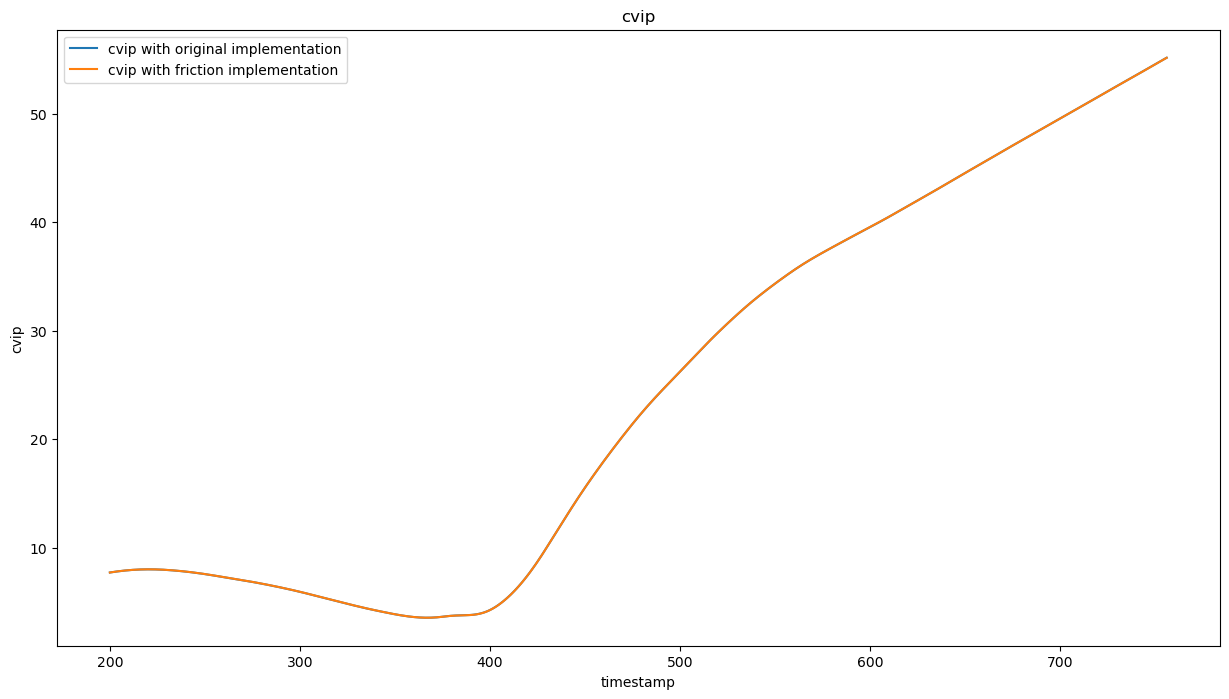

In [74]:
plt.figure(figsize=(15,8))

df_orig_cvip = pd.DataFrame()

for i in range(0, len(df_array_orig)):
    if(df_array_orig[i]['cvip'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_orig[i]['cvip'].isnull().values.any():
            df_orig_cvip["Run"+str(i)] = df_array_orig[i]['cvip']

median_orig_cvip = df_orig_cvip.median(axis=1)


plt.plot(median_orig_cvip[200:])


df_fric_cvip = pd.DataFrame()

for i in range(0, len(df_array_fric)):
    if(df_array_fric[i]['cvip'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[i]['cvip'].isnull().values.any() :
            df_fric_cvip["Run"+str(i)] = df_array_fric[i]['cvip']

median_fric_cvip = df_fric_cvip.median(axis=1)

plt.plot(median_fric_cvip[200:])

# plt.axis('equal')
plt.xlabel("timestamp")
plt.ylabel("cvip")
plt.title("cvip")
plt.legend(["cvip with original implementation", "cvip with friction implementation"])
plt.show()

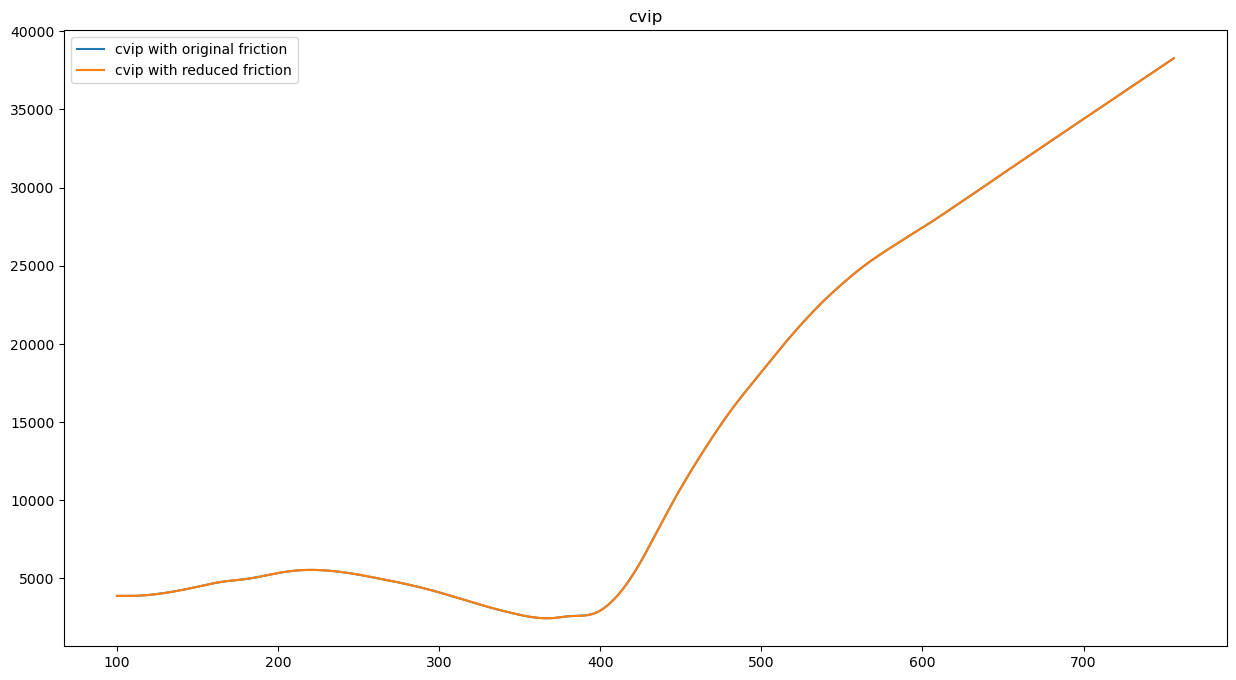

In [70]:
plt.figure(figsize=(15,8))

df_avg_orig_cvip = df_array_orig[0]['cvip']
count = 0

for i in range(1, len(df_array_orig)):
    if(df_array_orig[i]['cvip'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_orig[i]['cvip'].isnull().values.any():
            df_avg_orig_cvip+=df_array_orig[i]['cvip']
            count+=1
df_avg_orig_cvip.interpolate().dropna()/count


df_avg_cvip = df_array_fric[0]['cvip']

count = 0
for i in range(1, len(df_array_fric)):
    if(df_array_fric[i]['cvip'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[i]['cvip'].isnull().values.any():
            df_avg_cvip+=df_array_fric[i]['cvip']
            count+=1
df_avg_cvip.interpolate().dropna()/count

df_avg_orig_cvip.iloc[100:].plot(title="cvip")
df_avg_cvip.iloc[100:].plot(label='Reduced')

plt.legend(["cvip with original friction", "cvip with reduced friction"])
plt.show()

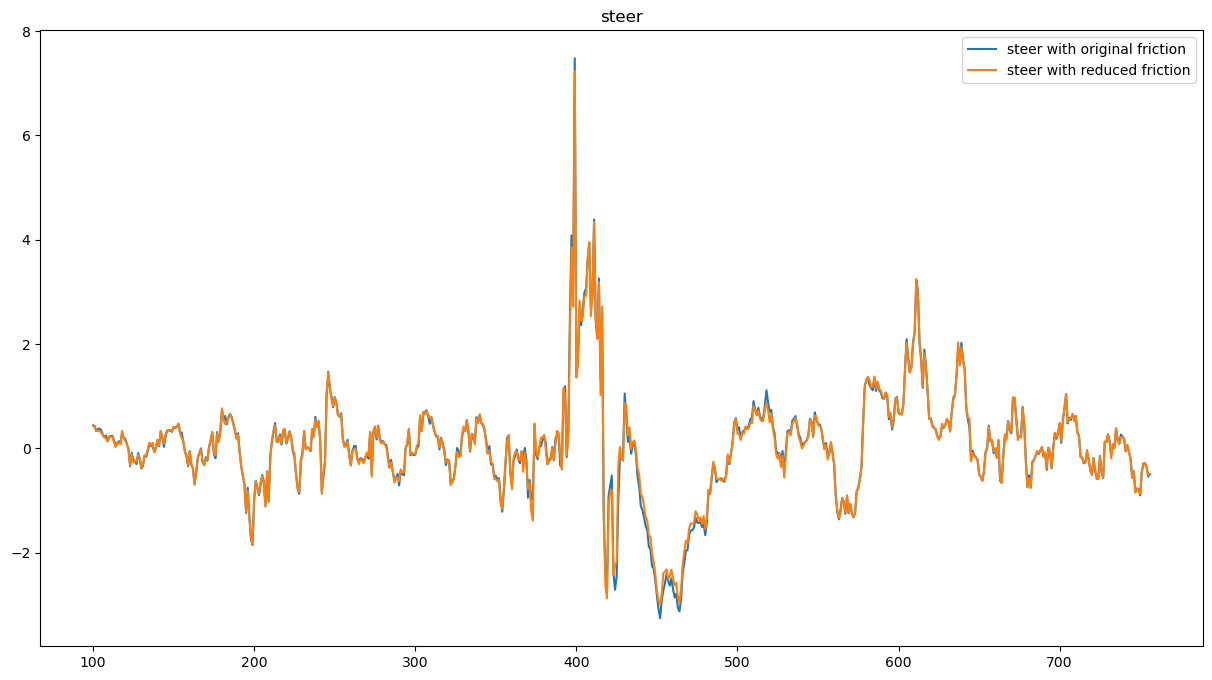

In [69]:
plt.figure(figsize=(15,8))

df_avg_orig_steer = df_array_orig[0]['steer']
count = 0

for i in range(1, len(df_array_orig)):
    if(df_array_orig[i]['steer'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_orig[i]['steer'].isnull().values.any():
            df_avg_orig_steer+=df_array_orig[i]['steer']
            count+=1
df_avg_orig_steer.interpolate().dropna()/count


df_avg_steer = df_array_fric[0]['steer']

count = 0
for i in range(1, len(df_array_fric)):
    if(df_array_fric[i]['steer'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[i]['steer'].isnull().values.any():
            df_avg_steer+=df_array_fric[i]['steer']
            count+=1
df_avg_steer.interpolate().dropna()/count

df_avg_orig_steer.iloc[100:].plot(title="steer")
df_avg_steer.iloc[100:].plot(label='Reduced')

plt.legend(["steer with original friction", "steer with reduced friction"])
plt.show()

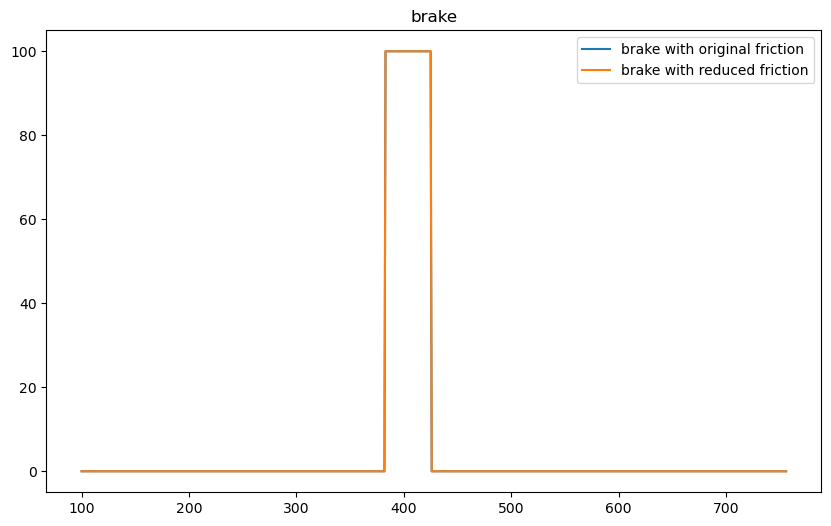

In [71]:
plt.figure(figsize=(10,6))

df_avg_orig_brake = df_array_orig[0]['brake']
count = 0

for i in range(1, len(df_array_orig)):
    if(df_array_orig[i]['brake'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_orig[i]['brake'].isnull().values.any():
            df_avg_orig_brake+=df_array_orig[i]['brake']
            count+=1
df_avg_orig_brake.interpolate().dropna()/count


df_avg_brake = df_array_fric[0]['brake']

count = 0
for i in range(1, len(df_array_fric)):
    if(df_array_fric[i]['brake'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[i]['brake'].isnull().values.any():
            df_avg_brake+=df_array_fric[i]['brake']
            count+=1
df_avg_brake.interpolate().dropna()/count

df_avg_orig_brake.iloc[100:].plot(title="brake")
df_avg_brake.iloc[100:].plot(label='Reduced')

plt.legend(["brake with original friction", "brake with reduced friction"])
plt.show()

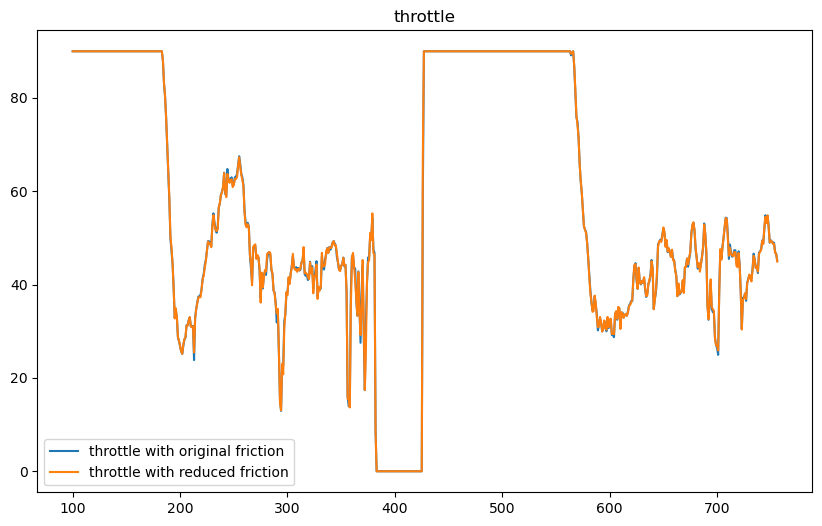

In [72]:
plt.figure(figsize=(10,6))

df_avg_orig_throttle = df_array_orig[0]['throttle']
count = 0

for i in range(1, len(df_array_orig)):
    if(df_array_orig[i]['throttle'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_orig[i]['throttle'].isnull().values.any():
            df_avg_orig_throttle+=df_array_orig[i]['throttle']
            count+=1
df_avg_orig_throttle.interpolate().dropna()/count


df_avg_throttle = df_array_fric[0]['throttle']

count = 0
for i in range(1, len(df_array_fric)):
    if(df_array_fric[i]['throttle'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[i]['throttle'].isnull().values.any():
            df_avg_throttle+=df_array_fric[i]['throttle']
            count+=1
df_avg_throttle.interpolate().dropna()/count

df_avg_orig_throttle.iloc[100:].plot(title="throttle")
df_avg_throttle.iloc[100:].plot(label='Reduced')

plt.legend(["throttle with original friction", "throttle with reduced friction"])
plt.show()

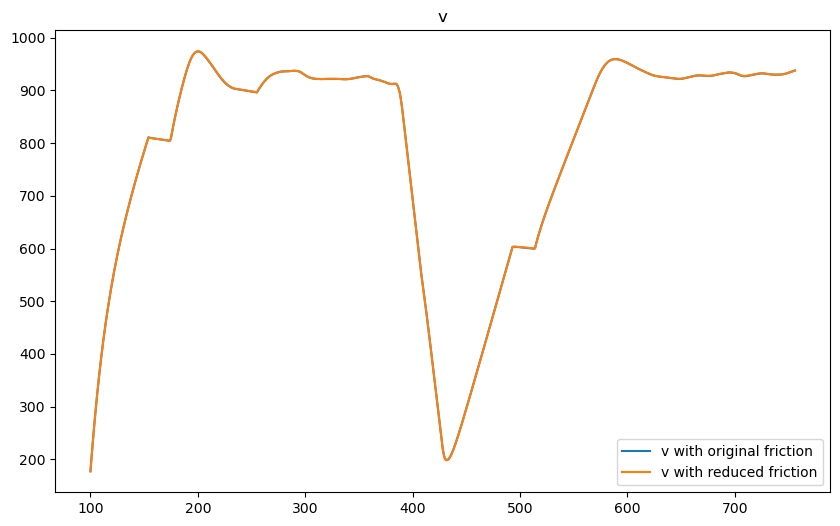

In [73]:
plt.figure(figsize=(10,6))

df_avg_orig_v = df_array_orig[0]['v']
count = 0

for i in range(1, len(df_array_orig)):
    if(df_array_orig[i]['v'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_orig[i]['v'].isnull().values.any():
            df_avg_orig_v+=df_array_orig[i]['v']
            count+=1
df_avg_orig_v.interpolate().dropna()/count


df_avg_v = df_array_fric[0]['v']

count = 0
for i in range(1, len(df_array_fric)):
    if(df_array_fric[i]['v'].dtypes == 'object'):
        print(i)
    else:
        if not df_array_fric[i]['v'].isnull().values.any():
            df_avg_v+=df_array_fric[i]['v']
            count+=1
df_avg_v.interpolate().dropna()/count

df_avg_orig_v.iloc[100:].plot(title="v")
df_avg_v.iloc[100:].plot(label='Reduced')

plt.legend(["v with original friction", "v with reduced friction"])
plt.show()

## Dynamic time warping (DTW) for cvip
### measuring similarity between two temporal sequences

In [75]:
distance = dtw.distance(median_orig_cvip, median_fric_cvip)

In [76]:
distance

0.08939207349725889

## KS Test for cvip

In [78]:
import scipy as sp

In [79]:
sp.stats.ks_2samp(median_orig_cvip, median_fric_cvip)

KstestResult(statistic=0.005284015852047556, pvalue=1.0, statistic_location=7.995562284255972, statistic_sign=1)

You reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than your significance level.
**pvalue=4.2177381979173086e-06**